In [1]:
import pandas as pd
import numpy as np

In [2]:
#导入经过数据预处理和特征工程的数据
df = pd.read_csv(r"C:\Users\Administrator\Desktop\数据挖掘\data_.csv",index_col=0)

In [3]:
df.head()

,0_x,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0_y
0,-0.390704,-0.201280,-0.799040,0.772736,-0.096287,-1.119544,-0.377614,-1.019579,-0.679865,-0.287527,...,-0.545560,-0.176020,-0.506717,-0.458513,0.122106,-0.144873,0.338192,-0.259763,-0.385553,1
1,-0.165808,-0.815437,-0.572465,0.030293,0.048196,0.549394,-0.605482,1.008921,-0.440776,0.144876,...,1.169343,0.258752,0.028600,-0.458513,0.485705,0.741561,-0.198579,-0.314891,-0.580758,0
2,-0.165808,-0.815437,0.107262,-1.454592,1.878320,-0.887747,-0.662449,-0.581773,0.276492,-1.224401,...,-1.307739,-1.444106,-0.506717,0.241049,-5.453085,3.803787,1.411734,0.291510,1.956912,1
3,-0.390704,0.412876,0.560412,1.090925,-0.722382,1.105706,-0.662449,1.184043,0.754671,-0.071325,...,-0.164471,1.780456,0.028600,0.590830,0.546305,-1.031307,-0.735350,-0.425145,-1.361580,0
4,-0.390704,1.027033,-0.572465,-1.136402,1.781998,-0.563231,-0.092780,0.016562,-0.440776,-0.719930,...,-1.307739,-0.212251,-0.506717,-0.341919,0.697805,3.642617,-0.198579,-0.094381,0.590474,1


In [4]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [6]:
from time import time
import datetime
from sklearn.model_selection import GridSearchCV
import numpy as np

## 决策树调参

In [7]:
from sklearn.tree import DecisionTreeClassifier
times = time()
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=5)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

时间:04:34:372909


In [8]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [9]:
GS.best_score_

0.7694174757281553

In [10]:
clf = DecisionTreeClassifier(splitter='best',criterion='entropy',
                             max_depth=9,min_impurity_decrease=0,min_samples_leaf=6,random_state=25).fit(Xtrain,Ytrain)

In [11]:
from sklearn import metrics
Ytest_pred1 = clf.predict(Xtest)
acc1 = metrics.accuracy_score(Ytest,Ytest_pred1)
precision1 = metrics.precision_score(Ytest,Ytest_pred1)
recall1 = metrics.recall_score(Ytest,Ytest_pred1)
f1_1 = metrics.f1_score(Ytest,Ytest_pred1)
auc1= metrics.roc_auc_score(Ytest,Ytest_pred1)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc1,precision1,recall1,f1_1,auc1))

准确率:0.7741,精确率:0.8008,召回率:0.7341,f1-score:0.7660,auc:0.7744


## 随机森林调参

0.8452830188679246 111


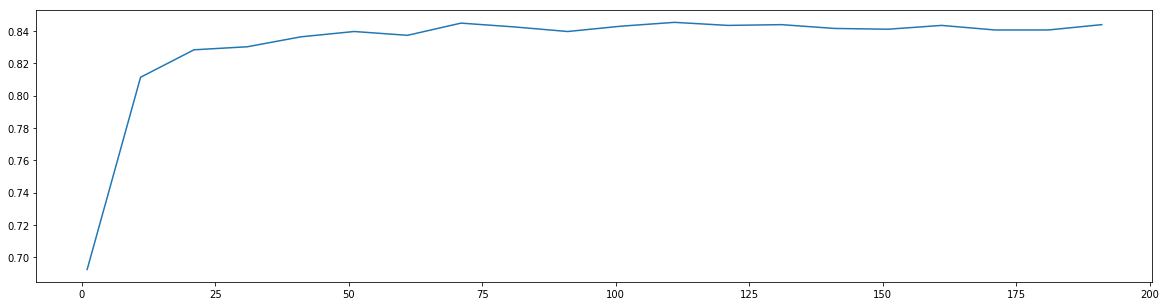

In [17]:
#由于随机森林参数太多，我们画学习曲线调n_estimators
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90).fit(Xtrain,Ytrain)
    Ytest_pred = rfc.predict(Xtest)
    score = metrics.accuracy_score(Ytest,Ytest_pred)
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [20]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=111,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=111, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
GS.best_params_

{'max_depth': 17}

In [22]:
GS.best_score_

0.8412216828478964

In [ ]:
#模型准确率下降，增大max_features

In [44]:
param_grid = {'max_features':np.arange(5,20,1)} 
rfc = RandomForestClassifier(n_estimators=111,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=111, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
GS.best_params_

{'max_features': 11}

In [46]:
GS.best_score_  #也没有原来只调节n_estimators好

0.8414239482200647

In [50]:
times = time()
parameters = {'min_samples_split':[2,5,10,15,100]  #默认为2
                ,'min_samples_leaf':[1,2,5,10]}
rfc = RandomForestClassifier(n_estimators=111,random_state=25)
GS = GridSearchCV(rfc, parameters, cv=5)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

时间:01:17:787177


In [51]:
GS.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5}

In [52]:
GS.best_score_  #最后的结果也没有之调节n_estimators好

0.8426375404530745

In [53]:
clf = RandomForestClassifier(n_estimators=111,random_state=90).fit(Xtrain,Ytrain)

In [54]:
Ytest_pred2 = clf.predict(Xtest)
acc2 = metrics.accuracy_score(Ytest,Ytest_pred2)
precision2 = metrics.precision_score(Ytest,Ytest_pred2)
recall2 = metrics.recall_score(Ytest,Ytest_pred2)
f1_2 = metrics.f1_score(Ytest,Ytest_pred2)
auc2= metrics.roc_auc_score(Ytest,Ytest_pred2)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc2,precision2,recall2,f1_2,auc2))

准确率:0.8453,精确率:0.8592,召回率:0.8287,f1-score:0.8437,auc:0.8454


## 逻辑回归调参

In [55]:
from sklearn.linear_model import LogisticRegression as LR
times = time()
parameters = {'penalty':['l1','l2'],
             'C':np.linspace(0.05,1,19)}
lr = LR().fit(Xtrain,Ytrain)
GS = GridSearchCV(lr, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linea

时间:00:08:230253


C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
GS.best_params_

{'C': 0.10277777777777777, 'penalty': 'l2'}

In [57]:
GS.best_score_

0.6998381877022654

In [58]:
lr = LR(C=0.1028).fit(Xtrain,Ytrain)

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
from sklearn import metrics
Ytest_pred3 = lr.predict(Xtest)
acc3 = metrics.accuracy_score(Ytest,Ytest_pred3)
precision3 = metrics.precision_score(Ytest,Ytest_pred3)
recall3 = metrics.recall_score(Ytest,Ytest_pred3)
f1_3 = metrics.f1_score(Ytest,Ytest_pred3)
auc3 = metrics.roc_auc_score(Ytest,Ytest_pred3)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc3,precision3,recall3,f1_3,auc3))

准确率:0.6920,精确率:0.7177,召回率:0.6404,f1-score:0.6769,auc:0.6924


## SVM调参

In [73]:
from sklearn.svm import SVC
times = time()
parameters = {'kernel':["linear","poly","sigmoid","rbf"],'C':np.linspace(0.05,1,19)}
svc = SVC(cache_size = 5000).fit(Xtrain,Ytrain)
GS = GridSearchCV(svc, parameters, cv=5)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

时间:07:14:030866


In [74]:
GS.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [75]:
GS.best_score_

0.7576860841423948

In [77]:
clf = SVC(kernel='rbf',gamma='auto',cache_size=5000).fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)  #上面没有调auto

0.7584905660377359

In [78]:
Ytest_pred4 = clf.predict(Xtest)
acc4 = metrics.accuracy_score(Ytest,Ytest_pred4)
precision4 = metrics.precision_score(Ytest,Ytest_pred4)
recall4 = metrics.recall_score(Ytest,Ytest_pred4)
f1_4 = metrics.f1_score(Ytest,Ytest_pred4)
auc4= metrics.roc_auc_score(Ytest,Ytest_pred4)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc4,precision4,recall4,f1_4,auc4))

准确率:0.7585,精确率:0.7720,召回率:0.7388,f1-score:0.7550,auc:0.7586


In [79]:
from xgboost import XGBClassifier as XGBC
times = time()
parameters = {'booster':["gbtree","gblinear","dart"],
              'reg_alpha':[0,0.1,0.5,1.0],
              'gamma':[0,0.05,0.1,0.3,0.5],
              'learning_rate':[0.01,0.015,0.025,0.05,0.1]}
xgbc = XGBC(cache_size = 5000).fit(Xtrain,Ytrain)
GS = GridSearchCV(xgbc, parameters, cv=5)
GS.fit(Xtrain,Ytrain)
print("时间:{}".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))

时间:13:58:034366


In [80]:
GS.best_params_

{'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.1, 'reg_alpha': 0.5}

In [81]:
GS.best_score_

0.8337378640776699

In [82]:
xgbc = XGBC(booster='gbtree',gamma=0.5,learning_rate=0.1,reg_alpha=0.5,cache_size = 5000).fit(Xtrain,Ytrain)

In [83]:
Ytest_pred5 = xgbc.predict(Xtest)
acc5 = metrics.accuracy_score(Ytest,Ytest_pred5)
precision5 = metrics.precision_score(Ytest,Ytest_pred5)
recall5 = metrics.recall_score(Ytest,Ytest_pred5)
f1_5 = metrics.f1_score(Ytest,Ytest_pred5)
auc5 = metrics.roc_auc_score(Ytest,Ytest_pred5)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc5,precision5,recall5,f1_5,auc5))

准确率:0.8335,精确率:0.8579,召回率:0.8024,f1-score:0.8292,auc:0.8337


In [86]:
index = ["决策树","随机森林","逻辑回归","SVM","XGBoost"]
columns = ["准确率","精确率","召回率","f1","auc"]
pd.DataFrame([[acc1,precision1,recall1,f1_1,auc1],
            [acc2,precision2,recall2,f1_2,auc2],
            [acc3,precision3,recall3,f1_3,auc3],
            [acc4,precision4,recall4,f1_4,auc4],
            [acc5,precision5,recall5,f1_5,auc5]],index=index,columns=columns)

,准确率,精确率,召回率,f1,auc
决策树,0.774057,0.800817,0.734082,0.765999,0.774361
随机森林,0.845283,0.859223,0.828652,0.843661,0.845409
逻辑回归,0.691981,0.717733,0.640449,0.676893,0.692373
SVM,0.758491,0.772016,0.738764,0.755024,0.758641
XGBoost,0.833491,0.857858,0.802434,0.829221,0.833727
